In [25]:
import numpy as np
import matplotlib.pyplot as plt

import csiborgtools

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
nsim = 17417
kind = "main"

paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)

In [144]:
cat0 = csiborgtools.read.CSiBORG2Catalogue(nsim, 99, kind)
catxs = [csiborgtools.read.CSiBORG2Catalogue(n, 99, kind) for n in paths.get_ics("csiborg2_main") if n != nsim]

In [183]:
merger_reader = {nsim: csiborgtools.read.CSiBORG2MergerTreeReader(nsim, kind)
                 for nsim in paths.get_ics("csiborg2_main")}

Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...
Creating group to tree ID mapping...


In [145]:
overlap_reader = csiborgtools.summary.NPairsOverlap(cat0, catxs, 12.25)

Loading overlap objects:   0%|          | 0/19 [00:00<?, ?it/s]

Loading overlap objects: 100%|██████████| 19/19 [02:34<00:00,  8.15s/it]


In [147]:
max_overlap = overlap_reader.max_overlap(0, True)

mean_overlap = np.mean(max_overlap, axis=1)
std_overlap = np.std(max_overlap, axis=1)

Calculating maximum overlap: 100%|██████████| 19/19 [00:03<00:00,  4.78it/s]


In [177]:
indx = overlap_reader.max_overlap_key("index", 0, True)

Calculating maximum overlap index:   0%|          | 0/19 [00:00<?, ?it/s]

Calculating maximum overlap index: 100%|██████████| 19/19 [00:02<00:00,  6.88it/s]


In [190]:
nsims = paths.get_ics("csiborg2_main")
indxs = indx[2].astype(int)

In [ ]:
datas

In [191]:
datas = [merger_reader[nsim].main_progenitor(i) for i, nsim in zip(indxs, nsims)]

In [192]:
data = merger_reader[17417].main_progenitor(2)

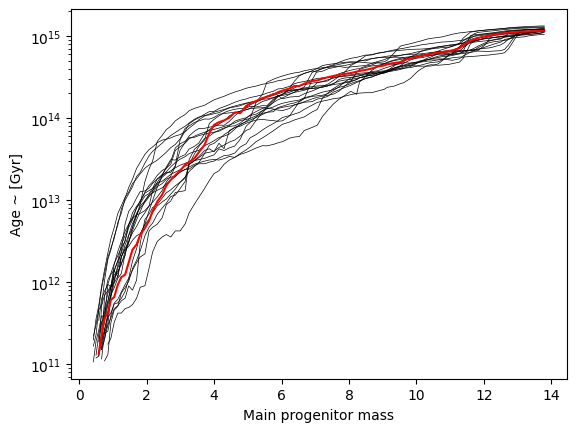

In [198]:
plt.figure()
for d in datas:
    plt.plot(d["Age"], d["MainProgenitorMass"], color="black", lw=0.5)
plt.plot(data["Age"], data["MainProgenitorMass"], color="red")
# plt.plot(datax["Age"], datax["MainProgenitorMass"])
# plt.plot(data["Age"], np.linalg.norm(data["MainProgenitorSpin"], axis=1) / data["MainProgenitorVmax"] / data["MainProgenitorVmaxRad"])
# plt.plot(data1["TimePhysical"], data1["Group_M_Crit200"], )
# plt.plot(data3["TimePhysical"], data3["Group_M_Crit200"], )
# plt.plot(data["Age"], )
plt.yscale("log")
# plt.xscale("log")
plt.ylabel("Age ~ [Gyr]")
plt.xlabel("Main progenitor mass")
plt.savefig("../plots/virgo.png")
plt.show()

In [6]:
cat.keys()

['cartesian_pos',
 'spherical_pos',
 'dist',
 'cartesian_redshiftspace_pos',
 'spherical_redshiftspace_pos',
 'redshiftspace_dist',
 'cartesian_vel',
 'particle_offsetnpart',
 'totmass',
 'index',
 'lagpatch_coordinates',
 'lagpatch_radius',
 'GroupFirstSub',
 'GroupContamination',
 'GroupNsubs',
 'Group_M_Crit200']

In [7]:
cat["lagpatch_radius"]

array([23.67523   , 21.395777  , 18.554184  , ...,  1.1907636 ,
        0.97668505,  1.5272977 ], dtype=float32)